Import Libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from flask import Flask, request, render_template

Import Dataset

In [63]:
dataFrame = pd.read_csv("drive/MyDrive/Colab_Datasets/telco_dataset.csv")

Remove Irrelavant Columns

In [64]:
dataFrame = dataFrame.drop(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Internet Service', 'Contract', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'], axis = 1)
#dataFrame

Analyze the Dataset

In [65]:
dataFrame.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,No,No,No,No,No,No,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Electronic check,99.65,820.5,1
3,Female,No,Yes,Yes,28,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Bank transfer (automatic),103.70,5036.3,1


In [66]:
dataFrame.tail()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
7038,Female,No,No,No,72,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,Bank transfer (automatic),21.15,1419.4,0
7039,Male,No,Yes,Yes,24,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Mailed check,84.80,1990.5,0
7040,Female,No,Yes,Yes,72,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Credit card (automatic),103.20,7362.9,0
7041,Female,No,Yes,Yes,11,No,No phone service,Yes,No,No,No,No,No,Yes,Electronic check,29.60,346.45,0
7042,Male,No,No,No,66,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),105.65,6844.5,0


In [67]:
dataFrame.shape

(7043, 18)

In [68]:
dataFrame.dtypes

Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Value            int64
dtype: object

In [69]:
dataFrame.describe()

,Tenure Months,Monthly Charges,Churn Value
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.265370
std,24.559481,30.090047,0.441561
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,1.000000
max,72.000000,118.750000,1.000000


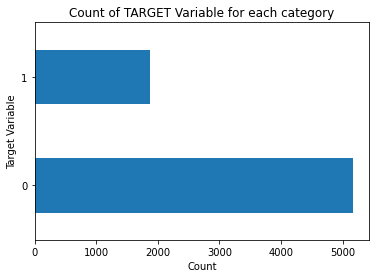

In [70]:
#Analyze the balance predictive column
dataFrame['Churn Value'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("Count of TARGET Variable for each category");

In [71]:
dataFrame['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

Formatting Data

In [72]:
#format 'Gender' attribute

def formatGender(str):
  if str == 'Male':
    return 1
  else:
    return 0

dataFrame['Gender'] = dataFrame['Gender'].apply(formatGender)
#dataFrame

In [73]:
#format Yes/No categorical data

def formatYesNo(str):
  if str == 'Yes':
    return 1
  else:
    return 0

dataFrame['Senior Citizen'] = dataFrame['Senior Citizen'].apply(formatYesNo)
dataFrame['Partner'] = dataFrame['Partner'].apply(formatYesNo)
dataFrame['Dependents'] = dataFrame['Dependents'].apply(formatYesNo)
dataFrame['Phone Service'] = dataFrame['Phone Service'].apply(formatYesNo)
dataFrame['Multiple Lines'] = dataFrame['Multiple Lines'].apply(formatYesNo)
dataFrame['Online Security'] = dataFrame['Online Security'].apply(formatYesNo)
dataFrame['Online Backup'] = dataFrame['Online Backup'].apply(formatYesNo)
dataFrame['Device Protection'] = dataFrame['Device Protection'].apply(formatYesNo)
dataFrame['Tech Support'] = dataFrame['Tech Support'].apply(formatYesNo)
dataFrame['Streaming TV'] = dataFrame['Streaming TV'].apply(formatYesNo)
dataFrame['Streaming Movies'] = dataFrame['Streaming Movies'].apply(formatYesNo)
dataFrame['Paperless Billing'] = dataFrame['Paperless Billing'].apply(formatYesNo)
#dataFrame

In [74]:
#format 'Tenure Months' numerical data
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
dataFrame['Tenure Months'] = pd.cut(dataFrame['Tenure Months'], range(1, 80, 12), right=False, labels=labels)
dataFrame['Tenure Months'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: Tenure Months, dtype: int64

In [75]:
#convert 'Total Charges' object type to numeric type
dataFrame['Total Charges'] = pd.to_numeric(dataFrame['Total Charges'], errors = 'coerce')
#dataFrame

In [76]:
#convert categorical variables into dummy variables
dataFrame = pd.get_dummies(dataFrame)
#dataFrame

Handling Missing Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


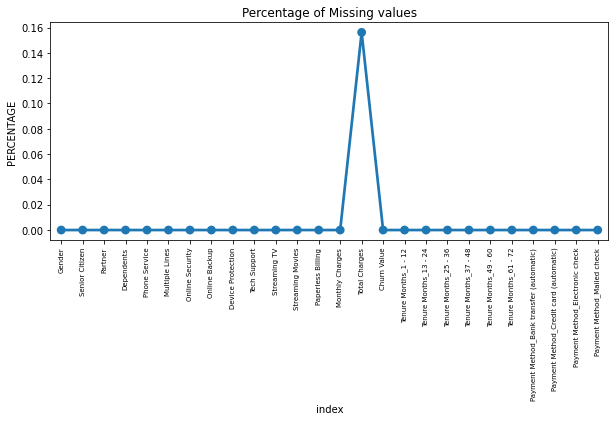

In [77]:
#finding missing values
missing_Val = pd.DataFrame((dataFrame.isnull().sum())*100/dataFrame.shape[0]).reset_index()
plt.figure(figsize=(10,4))
ax = sns.pointplot('index',0,data=missing_Val)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [78]:
#remove missing values
dataFrame.dropna(how = 'any', inplace = True)

Analyze Preprocessed Dataset

In [79]:
dataFrame.shape

(7032, 26)

In [80]:
dataFrame.dtypes

Gender                                        int64
Senior Citizen                                int64
Partner                                       int64
Dependents                                    int64
Phone Service                                 int64
Multiple Lines                                int64
Online Security                               int64
Online Backup                                 int64
Device Protection                             int64
Tech Support                                  int64
Streaming TV                                  int64
Streaming Movies                              int64
Paperless Billing                             int64
Monthly Charges                             float64
Total Charges                               float64
Churn Value                                   int64
Tenure Months_1 - 12                          uint8
Tenure Months_13 - 24                         uint8
Tenure Months_25 - 36                         uint8
Tenure Month

In [81]:
dataFrame.describe()

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,...,Tenure Months_1 - 12,Tenure Months_13 - 24,Tenure Months_25 - 36,Tenure Months_37 - 48,Tenure Months_49 - 60,Tenure Months_61 - 72,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.00000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.230375,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,...,0.309300,0.14562,0.118316,0.108362,0.118316,0.200085,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.421103,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,...,0.462238,0.35275,0.323005,0.310859,0.323005,0.400092,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

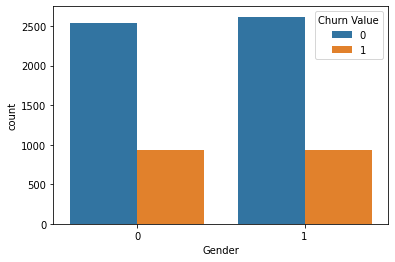

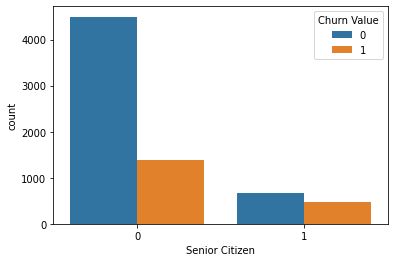

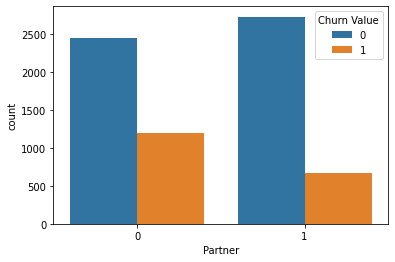

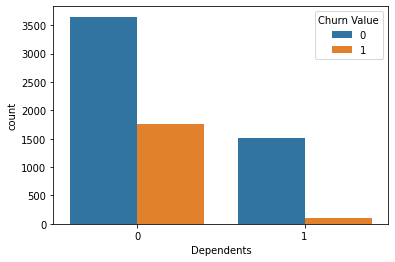

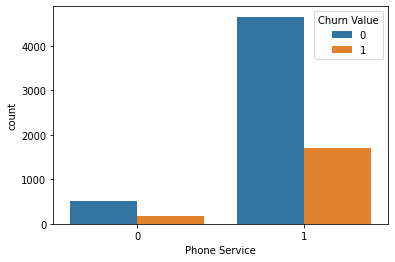

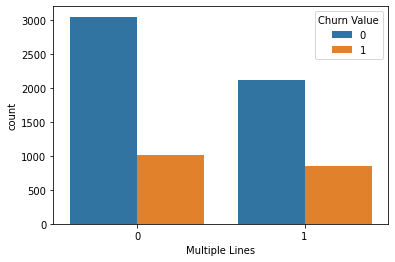

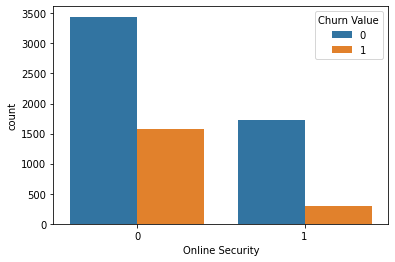

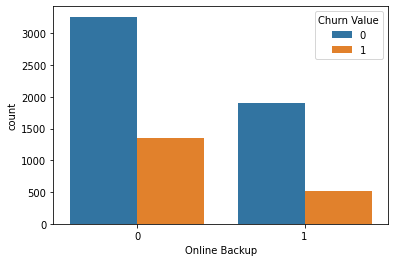

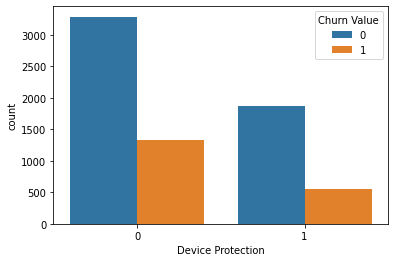

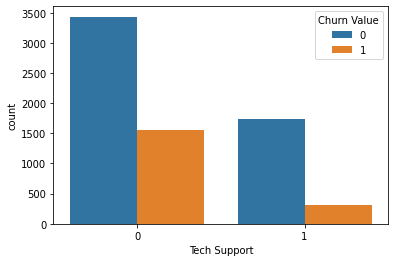

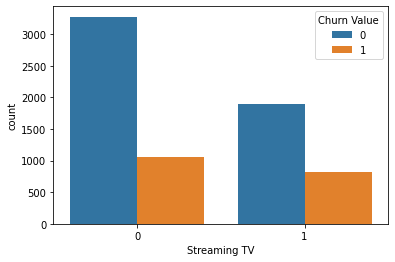

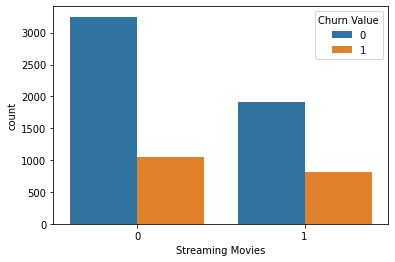

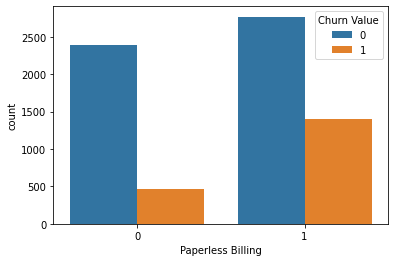

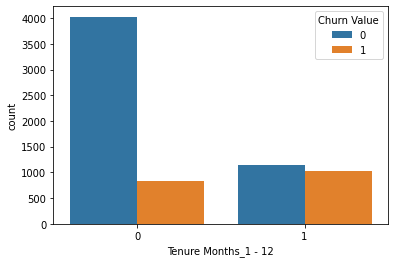

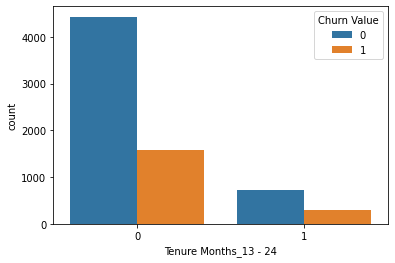

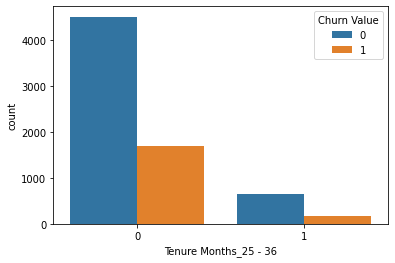

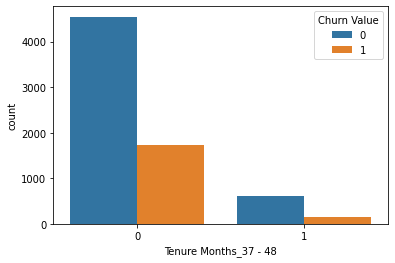

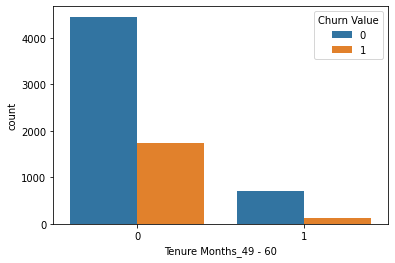

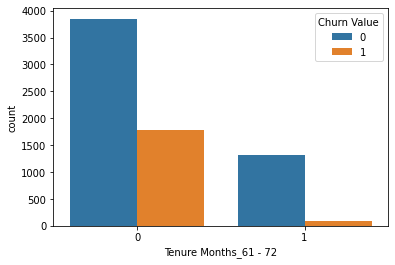

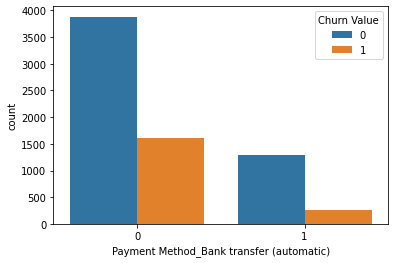

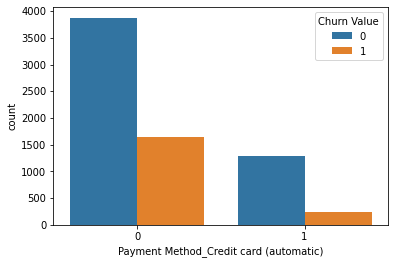

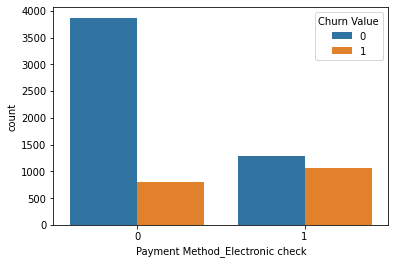

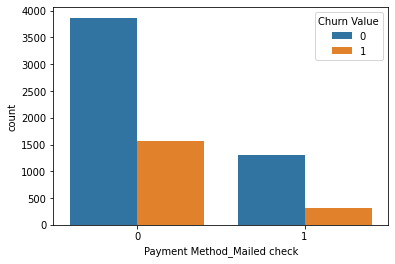

In [82]:
for i, predictor in enumerate(dataFrame.drop(columns=['Total Charges', 'Monthly Charges','Churn Value'])):
    plt.figure(i)
    sns.countplot(data=dataFrame, x=predictor, hue='Churn Value')

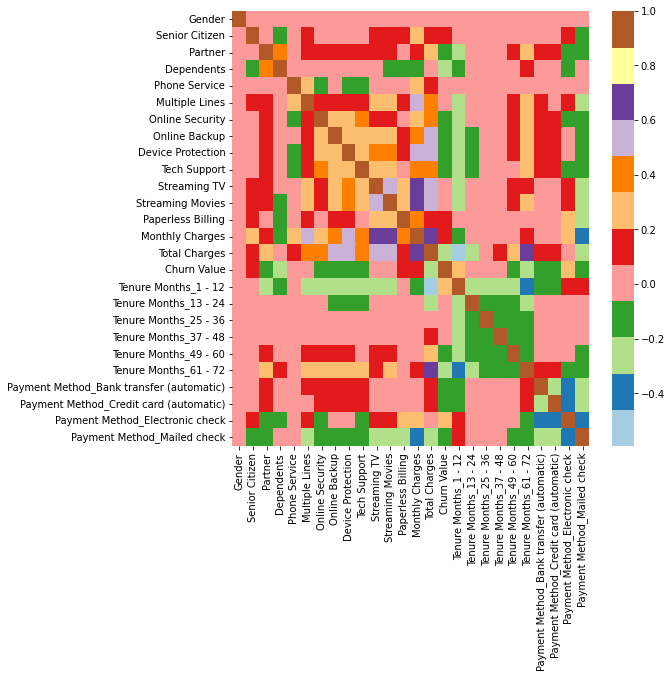

In [83]:
plt.figure(figsize=(8,8))
sns.heatmap(dataFrame.corr(), cmap="Paired")

Split into Training set & Testing Set

In [84]:
x = dataFrame.drop('Churn Value', axis=1)
y = dataFrame['Churn Value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Support Vector Classification

In [85]:
from sklearn.svm import SVC

model_1 = SVC(kernel = 'rbf', C = 1, gamma = 0.001, random_state = 1)
model_1.fit(x_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = model_1.predict(x_test)
print('Accuracy : ', accuracy_score(y_test, y_predict))

Accuracy :  0.7839374555792467


Naive Bayes Classifier

In [86]:
from sklearn.naive_bayes import GaussianNB

model_2 = GaussianNB()
model_2.fit(x_train, y_train)
y_predict = model_2.predict(x_test)

from sklearn.metrics import accuracy_score

y_predict = model_2.predict(x_test)
print('Accuracy : ', accuracy_score(y_test, y_predict))

Accuracy :  0.7334754797441365


Decision Tree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier

model_3 = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 6, min_samples_leaf = 8)
model_3.fit(x_train, y_train)
y_predict = model_3.predict(x_test)

from sklearn.metrics import accuracy_score

y_predict = model_3.predict(x_test)
print('Accuracy : ', accuracy_score(y_test, y_predict))

Accuracy :  0.7882018479033405


Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

model_4 = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf = 8)
model_4.fit(x_train, y_train)
y_predict = model_4.predict(x_test)

from sklearn.metrics import accuracy_score

y_predict = model_4.predict(x_test)
print('Accuracy : ', accuracy_score(y_test, y_predict))

Accuracy :  0.8009950248756219


Pickling the Model

In [89]:
import pickle
filename = 'model.sav'
pickle.dump(model_4, open(filename, 'wb'))